In [1]:
import torch
import torchvision
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_set = torchvision.datasets.MNIST(
    root='data', transform=torchvision.transforms.ToTensor(), train=True, download=True
)


In [4]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [5]:
class Generator(torch.nn.Module):
    def __init__(self, zdim, outchannels=1):
        super(Generator, self).__init__()
        
        self.gen = torch.nn.Sequential(
            self.unit(zdim, 256, 3, 1),
            self.unit(256, 128, 4, 1),
            self.unit(128, 64, 3, 1),
            torch.nn.ConvTranspose2d(64, outchannels, 4, 1),
            torch.nn.Tanh()
        )
    
    def unit(self, inchannels, outchannels, kernel=3, stride=1):
        return torch.nn.Sequential(
                torch.nn.ConvTranspose2d(inchannels, outchannels, kernel, stride),
                torch.nn.BatchNorm2d(outchannels),
                torch.nn.ReLU(inplace=True)
            )
        
    def forward(self, noise):
        return self.gen(noise)
    

class Discriminator(torch.nn.Module):
    def __init__(self, inchannels=1):
        super(Discriminator, self).__init__()
        
        self.disc = torch.nn.Sequential(
            self.unit(inchannels, 16),
            self.unit(16, 32),
            torch.nn.Conv2d(32, 1, 3, 1),
        )
        
    def unit(self, inchannels, outchannels, kernel=3, stride=1):
        return torch.nn.Sequential(
                torch.nn.Conv2d(inchannels, outchannels, kernel, stride),
                torch.nn.BatchNorm2d(outchannels),
                torch.nn.LeakyReLU(0.2, inplace=True)
            )
        
    def forward(self, image):
        return self.disc(image)

In [6]:
def disc_loss_fn(disc_model, real, fake, criterion):
    # Real Image
    real_preds = disc_model(real)
    real_loss = criterion(real_preds, torch.ones_like(real_preds))
    
    # Fake Image
    fake_preds = disc_model(fake.detach())
    fake_loss = criterion(fake_preds, torch.zeros_like(fake_preds))
    
    return real_loss + fake_loss

def gen_loss_fn(gen_model, disc_model, noise, criterion):
    fake = gen_model(noise)
    fake_preds = disc_model(fake)
    fake_loss = criterion(fake_preds, torch.ones_like(fake_preds))
    
    return fake_loss, fake

def random_noise(batch_size, dim=10, device='cuda'):
    return torch.randn(batch_size, dim, device=device).view(batch_size, dim, 1, 1)

In [7]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = torchvision.utils.make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.axis('off')
    plt.show()
    
def show_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu()
    image_grid = torchvision.utils.make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.axis('off')
    plt.show()

Epoch:    1/500 | G Loss: 0.91606         | D Loss: 1.1264
Epoch:    2/500 | G Loss: 0.88163         | D Loss: 1.1848
Epoch:    3/500 | G Loss: 0.91151         | D Loss: 1.1772
Epoch:    4/500 | G Loss: 0.92792         | D Loss: 1.1683
Epoch:    5/500 | G Loss: 0.9455         | D Loss: 1.1543
Epoch:    6/500 | G Loss: 0.97794         | D Loss: 1.122
Epoch:    7/500 | G Loss: 1.0726         | D Loss: 1.0422
Epoch:    8/500 | G Loss: 1.0874         | D Loss: 1.0482
Epoch:    9/500 | G Loss: 1.1102         | D Loss: 1.0314


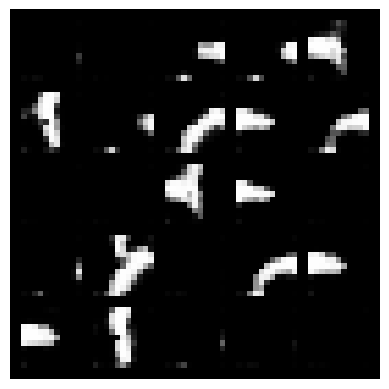

Epoch:   10/500 | G Loss: 1.1285         | D Loss: 1.0308
Epoch:   11/500 | G Loss: 1.1523         | D Loss: 1.0228
Epoch:   12/500 | G Loss: 1.1387         | D Loss: 1.0081
Epoch:   13/500 | G Loss: 1.14         | D Loss: 1.0239
Epoch:   14/500 | G Loss: 1.2136         | D Loss: 0.97131
Epoch:   15/500 | G Loss: 1.1186         | D Loss: 1.0621
Epoch:   16/500 | G Loss: 1.1746         | D Loss: 1.0142
Epoch:   17/500 | G Loss: 1.1459         | D Loss: 1.0324
Epoch:   18/500 | G Loss: 1.1524         | D Loss: 1.0224
Epoch:   19/500 | G Loss: 1.1702         | D Loss: 1.0125


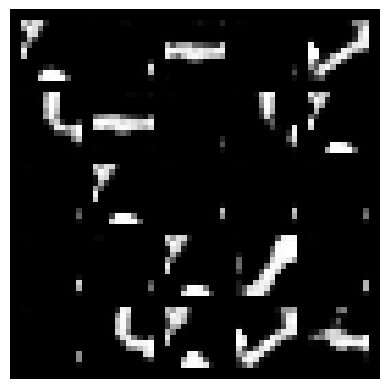

Epoch:   20/500 | G Loss: 1.1763         | D Loss: 1.0138
Epoch:   21/500 | G Loss: 1.2174         | D Loss: 1.0057
Epoch:   22/500 | G Loss: 1.2061         | D Loss: 1.0017
Epoch:   23/500 | G Loss: 1.2223         | D Loss: 0.9911
Epoch:   24/500 | G Loss: 1.2757         | D Loss: 0.97122
Epoch:   25/500 | G Loss: 1.3101         | D Loss: 0.94862
Epoch:   26/500 | G Loss: 1.391         | D Loss: 0.8712
Epoch:   27/500 | G Loss: 1.3502         | D Loss: 0.92034
Epoch:   28/500 | G Loss: 1.3284         | D Loss: 0.95479
Epoch:   29/500 | G Loss: 1.3429         | D Loss: 0.93299


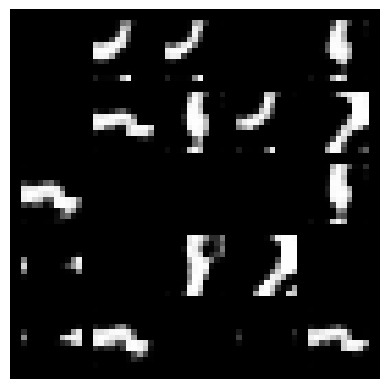

Epoch:   30/500 | G Loss: 1.3027         | D Loss: 0.9609
Epoch:   31/500 | G Loss: 1.3073         | D Loss: 0.98137
Epoch:   32/500 | G Loss: 1.3187         | D Loss: 0.96669
Epoch:   33/500 | G Loss: 1.3302         | D Loss: 0.96783
Epoch:   34/500 | G Loss: 1.3126         | D Loss: 0.97796
Epoch:   35/500 | G Loss: 1.3614         | D Loss: 0.92181
Epoch:   36/500 | G Loss: 1.3542         | D Loss: 0.95775
Epoch:   37/500 | G Loss: 1.3502         | D Loss: 0.93169
Epoch:   38/500 | G Loss: 1.3685         | D Loss: 0.93152
Epoch:   39/500 | G Loss: 1.3758         | D Loss: 0.92931


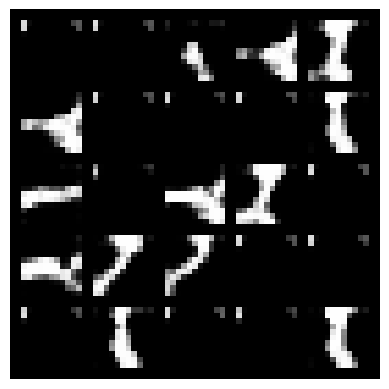

Epoch:   40/500 | G Loss: 1.3324         | D Loss: 0.96941
Epoch:   41/500 | G Loss: 1.4242         | D Loss: 0.9054
Epoch:   42/500 | G Loss: 1.4599         | D Loss: 0.86572
Epoch:   43/500 | G Loss: 1.4735         | D Loss: 0.87275
Epoch:   44/500 | G Loss: 1.4503         | D Loss: 0.89876
Epoch:   45/500 | G Loss: 1.4937         | D Loss: 0.85293
Epoch:   46/500 | G Loss: 1.4308         | D Loss: 0.90319
Epoch:   47/500 | G Loss: 1.3487         | D Loss: 0.97007
Epoch:   48/500 | G Loss: 1.3168         | D Loss: 0.96542
Epoch:   49/500 | G Loss: 1.3262         | D Loss: 0.96117


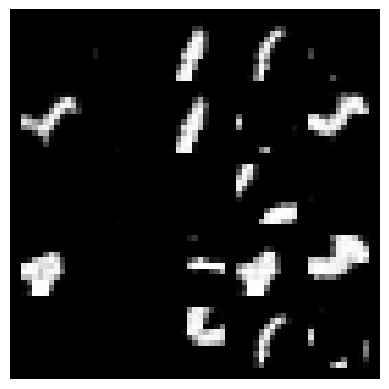

Epoch:   50/500 | G Loss: 1.313         | D Loss: 0.97636
Epoch:   51/500 | G Loss: 1.3344         | D Loss: 0.94576
Epoch:   52/500 | G Loss: 1.3609         | D Loss: 0.94144
Epoch:   53/500 | G Loss: 1.3865         | D Loss: 0.91765
Epoch:   54/500 | G Loss: 1.4132         | D Loss: 0.89389
Epoch:   55/500 | G Loss: 1.4178         | D Loss: 0.92414
Epoch:   56/500 | G Loss: 1.3867         | D Loss: 0.94943
Epoch:   57/500 | G Loss: 1.3951         | D Loss: 0.91929
Epoch:   58/500 | G Loss: 1.3673         | D Loss: 0.97852
Epoch:   59/500 | G Loss: 1.4115         | D Loss: 0.92566


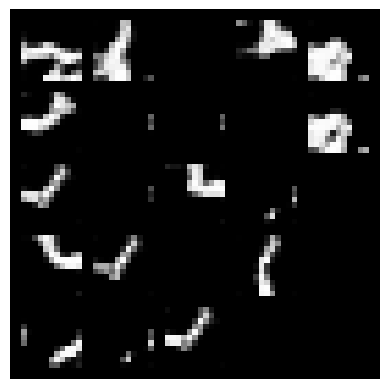

Epoch:   60/500 | G Loss: 1.3925         | D Loss: 0.91335
Epoch:   61/500 | G Loss: 1.4286         | D Loss: 0.9137
Epoch:   62/500 | G Loss: 1.4347         | D Loss: 0.90545
Epoch:   63/500 | G Loss: 1.4039         | D Loss: 0.92634
Epoch:   64/500 | G Loss: 1.4274         | D Loss: 0.90235
Epoch:   65/500 | G Loss: 1.4118         | D Loss: 0.91203
Epoch:   66/500 | G Loss: 1.4497         | D Loss: 0.90541
Epoch:   67/500 | G Loss: 1.4549         | D Loss: 0.89188
Epoch:   68/500 | G Loss: 1.4392         | D Loss: 0.90715
Epoch:   69/500 | G Loss: 1.46         | D Loss: 0.87857


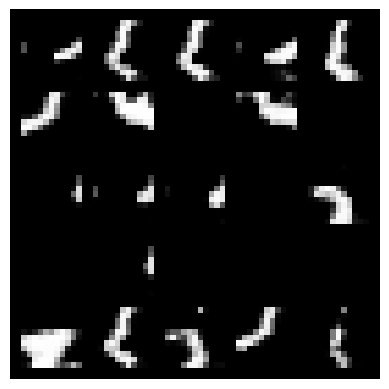

Epoch:   70/500 | G Loss: 1.448         | D Loss: 0.89852
Epoch:   71/500 | G Loss: 1.4387         | D Loss: 0.89927
Epoch:   72/500 | G Loss: 1.4571         | D Loss: 0.90301
Epoch:   73/500 | G Loss: 1.4195         | D Loss: 0.94191
Epoch:   74/500 | G Loss: 1.4007         | D Loss: 0.96451
Epoch:   75/500 | G Loss: 1.3989         | D Loss: 0.96533
Epoch:   76/500 | G Loss: 1.3914         | D Loss: 0.93354
Epoch:   77/500 | G Loss: 1.4021         | D Loss: 0.93919
Epoch:   78/500 | G Loss: 1.4203         | D Loss: 0.9172
Epoch:   79/500 | G Loss: 1.4069         | D Loss: 0.9275


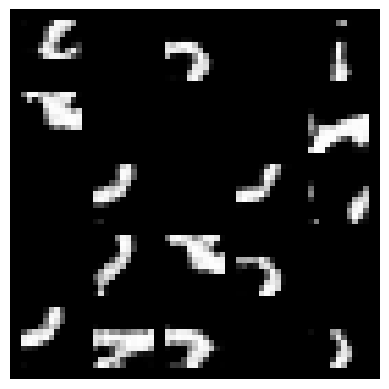

Epoch:   80/500 | G Loss: 1.4438         | D Loss: 0.90759
Epoch:   81/500 | G Loss: 1.3993         | D Loss: 0.93129
Epoch:   82/500 | G Loss: 1.4335         | D Loss: 0.89931
Epoch:   83/500 | G Loss: 1.4298         | D Loss: 0.92501
Epoch:   84/500 | G Loss: 1.4381         | D Loss: 0.92487
Epoch:   85/500 | G Loss: 1.452         | D Loss: 0.90937
Epoch:   86/500 | G Loss: 1.4142         | D Loss: 0.93118
Epoch:   87/500 | G Loss: 1.4557         | D Loss: 0.89761
Epoch:   88/500 | G Loss: 1.4714         | D Loss: 0.91086
Epoch:   89/500 | G Loss: 1.4986         | D Loss: 0.89115


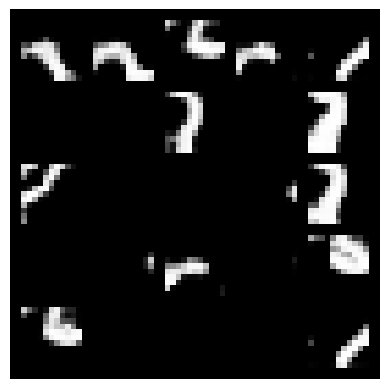

Epoch:   90/500 | G Loss: 1.4862         | D Loss: 0.91035
Epoch:   91/500 | G Loss: 1.4699         | D Loss: 0.91213
Epoch:   92/500 | G Loss: 1.459         | D Loss: 0.91648
Epoch:   93/500 | G Loss: 1.452         | D Loss: 0.90719
Epoch:   94/500 | G Loss: 1.4313         | D Loss: 0.92044
Epoch:   95/500 | G Loss: 1.4143         | D Loss: 0.92265
Epoch:   96/500 | G Loss: 1.4227         | D Loss: 0.92159
Epoch:   97/500 | G Loss: 1.3892         | D Loss: 0.95477
Epoch:   98/500 | G Loss: 1.3828         | D Loss: 0.94542
Epoch:   99/500 | G Loss: 1.3632         | D Loss: 0.95978


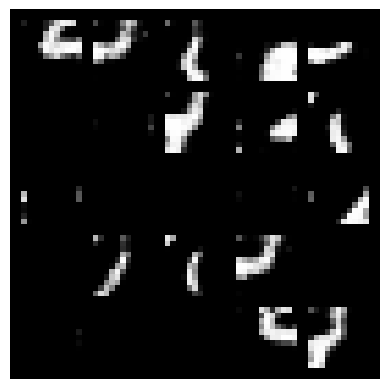

Epoch:  100/500 | G Loss: 1.3422         | D Loss: 0.97561
Epoch:  101/500 | G Loss: 1.3487         | D Loss: 0.97568
Epoch:  102/500 | G Loss: 1.328         | D Loss: 0.98475
Epoch:  103/500 | G Loss: 1.3307         | D Loss: 0.98275
Epoch:  104/500 | G Loss: 1.3329         | D Loss: 0.987
Epoch:  105/500 | G Loss: 1.3224         | D Loss: 0.98268
Epoch:  106/500 | G Loss: 1.3285         | D Loss: 0.97793
Epoch:  107/500 | G Loss: 1.3045         | D Loss: 0.99787
Epoch:  108/500 | G Loss: 1.2879         | D Loss: 1.0098
Epoch:  109/500 | G Loss: 1.2933         | D Loss: 0.99775


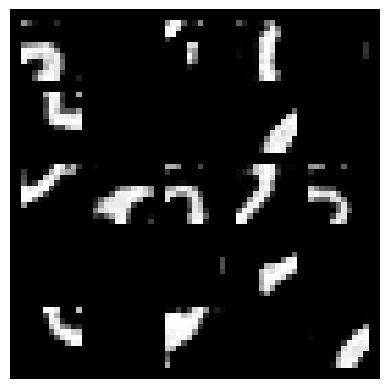

Epoch:  110/500 | G Loss: 1.2899         | D Loss: 1.0042
Epoch:  111/500 | G Loss: 1.2907         | D Loss: 1.0161
Epoch:  112/500 | G Loss: 1.2693         | D Loss: 1.0275
Epoch:  113/500 | G Loss: 1.2682         | D Loss: 1.0162
Epoch:  114/500 | G Loss: 1.2711         | D Loss: 1.0177
Epoch:  115/500 | G Loss: 1.2662         | D Loss: 1.0261
Epoch:  116/500 | G Loss: 1.2598         | D Loss: 1.0244
Epoch:  117/500 | G Loss: 1.2575         | D Loss: 1.0251
Epoch:  118/500 | G Loss: 1.2403         | D Loss: 1.0469
Epoch:  119/500 | G Loss: 1.2382         | D Loss: 1.0329


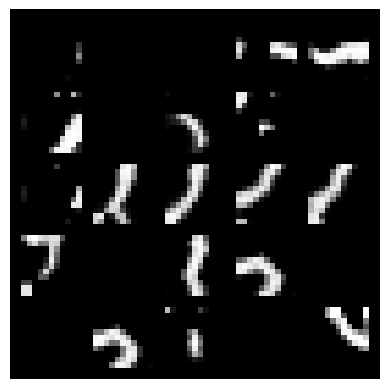

Epoch:  120/500 | G Loss: 1.2412         | D Loss: 1.0358
Epoch:  121/500 | G Loss: 1.24         | D Loss: 1.0282
Epoch:  122/500 | G Loss: 1.2422         | D Loss: 1.028
Epoch:  123/500 | G Loss: 1.243         | D Loss: 1.0342
Epoch:  124/500 | G Loss: 1.247         | D Loss: 1.0248
Epoch:  125/500 | G Loss: 1.2448         | D Loss: 1.022
Epoch:  126/500 | G Loss: 1.2443         | D Loss: 1.0257
Epoch:  127/500 | G Loss: 1.2437         | D Loss: 1.0226
Epoch:  128/500 | G Loss: 1.2398         | D Loss: 1.0278
Epoch:  129/500 | G Loss: 1.2516         | D Loss: 1.0219


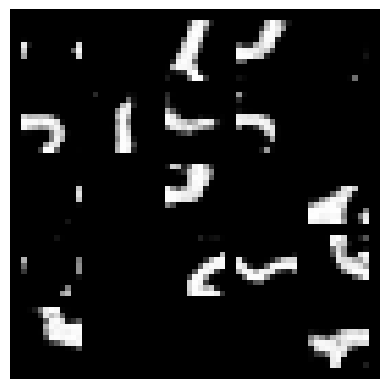

Epoch:  130/500 | G Loss: 1.2451         | D Loss: 1.025
Epoch:  131/500 | G Loss: 1.25         | D Loss: 1.0207
Epoch:  132/500 | G Loss: 1.24         | D Loss: 1.0265
Epoch:  133/500 | G Loss: 1.24         | D Loss: 1.0191
Epoch:  134/500 | G Loss: 1.2439         | D Loss: 1.0216
Epoch:  135/500 | G Loss: 1.2391         | D Loss: 1.0274
Epoch:  136/500 | G Loss: 1.2337         | D Loss: 1.0293
Epoch:  137/500 | G Loss: 1.2383         | D Loss: 1.0235
Epoch:  138/500 | G Loss: 1.2362         | D Loss: 1.0256
Epoch:  139/500 | G Loss: 1.2448         | D Loss: 1.0227


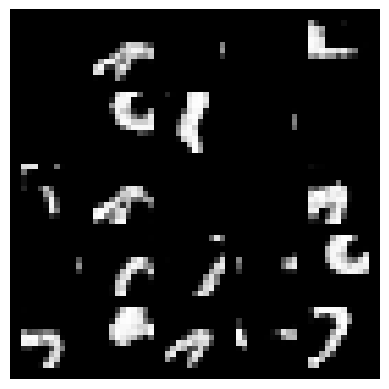

Epoch:  140/500 | G Loss: 1.2404         | D Loss: 1.0234
Epoch:  141/500 | G Loss: 1.425         | D Loss: 0.9174
Epoch:  142/500 | G Loss: 1.7015         | D Loss: 0.78044
Epoch:  143/500 | G Loss: 1.5024         | D Loss: 0.84745
Epoch:  144/500 | G Loss: 1.4866         | D Loss: 0.86115
Epoch:  145/500 | G Loss: 1.4545         | D Loss: 0.89174
Epoch:  146/500 | G Loss: 1.4528         | D Loss: 0.89857
Epoch:  147/500 | G Loss: 1.431         | D Loss: 0.91385
Epoch:  148/500 | G Loss: 1.4196         | D Loss: 0.92766
Epoch:  149/500 | G Loss: 1.4057         | D Loss: 0.93685


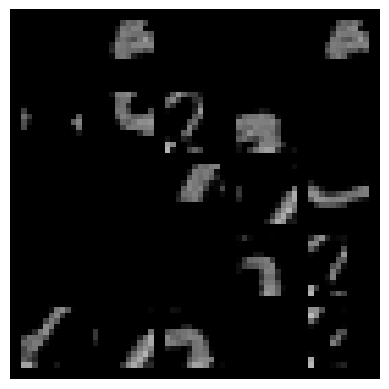

Epoch:  150/500 | G Loss: 1.4085         | D Loss: 0.9324
Epoch:  151/500 | G Loss: 1.4049         | D Loss: 0.94141
Epoch:  152/500 | G Loss: 1.3802         | D Loss: 0.94561
Epoch:  153/500 | G Loss: 1.3878         | D Loss: 0.94606
Epoch:  154/500 | G Loss: 1.3846         | D Loss: 0.94363
Epoch:  155/500 | G Loss: 1.3795         | D Loss: 0.95227
Epoch:  156/500 | G Loss: 1.3735         | D Loss: 0.95473
Epoch:  157/500 | G Loss: 1.3754         | D Loss: 0.95472
Epoch:  158/500 | G Loss: 1.3752         | D Loss: 0.9537
Epoch:  159/500 | G Loss: 1.3773         | D Loss: 0.96394


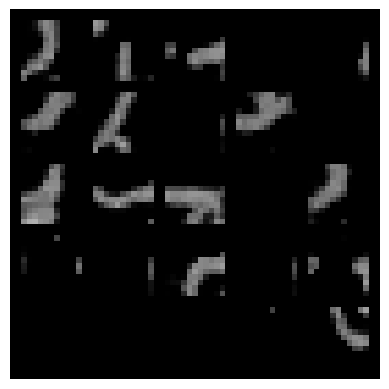

Epoch:  160/500 | G Loss: 1.3636         | D Loss: 0.96901
Epoch:  161/500 | G Loss: 1.3709         | D Loss: 0.96726
Epoch:  162/500 | G Loss: 1.3629         | D Loss: 0.98137
Epoch:  163/500 | G Loss: 1.3615         | D Loss: 0.98071
Epoch:  164/500 | G Loss: 1.3537         | D Loss: 0.98693
Epoch:  165/500 | G Loss: 1.3451         | D Loss: 0.99272
Epoch:  166/500 | G Loss: 1.3438         | D Loss: 0.99112
Epoch:  167/500 | G Loss: 1.3458         | D Loss: 0.98874
Epoch:  168/500 | G Loss: 1.3395         | D Loss: 0.99358
Epoch:  169/500 | G Loss: 1.3307         | D Loss: 0.99829


In [ ]:
epochs = 500
lr = 0.0002
noise_dim = 64

gen = Generator(zdim=noise_dim).to(device)
disc = Discriminator().to(device)

gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=[0.5, 0.999])
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=[0.5, 0.999])

def weights_init(m):
    if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, torch.nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

# gen = gen.apply(weights_init)
# disc = disc.apply(weights_init)



criterion = torch.nn.BCEWithLogitsLoss()

for i in range(epochs):
    losses = {
        'disc': 0,
        'gen': 0
    }
    c = 0
    for x, _ in train_loader:
        real = x.to(device)
        noise = random_noise(batch_size, dim=noise_dim, device=device)
        
                
        # Generator
        gen_opt.zero_grad()
        gen_loss, fake = gen_loss_fn(gen, disc, noise, criterion)
        gen_loss.backward(retain_graph=True)
        gen_opt.step()
        
        
        # Discriminator
        disc_opt.zero_grad()
        disc_loss = disc_loss_fn(disc, real, fake, criterion)
        disc_loss.backward(retain_graph=True)
        disc_opt.step()

        
        losses['disc'] += disc_loss.item()
        losses['gen'] += gen_loss.item()
        c += 1
    
    if (i+1) % 10 == 0:
        preds = gen(random_noise(25, dim=noise_dim, device=device))
        show_tensor_images(preds)
    
    if (i+1) % 1 == 0:
        print(f"Epoch: {i+1:4}/{epochs} | G Loss: {losses['gen']/c:.5} \
        | D Loss: {losses['disc']/c:.5}")
    